# Фрактальная размерность нефрона


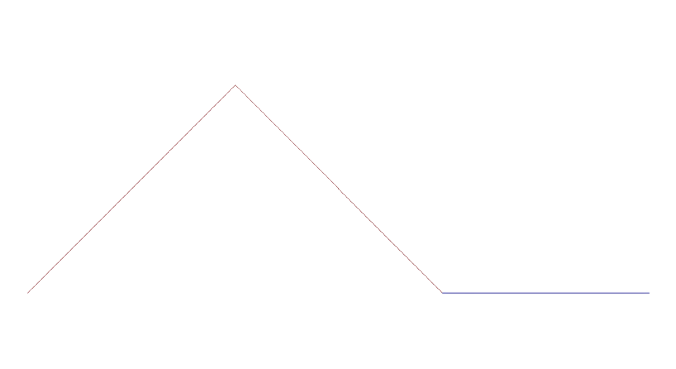

In [1]:
from IPython.display import Image
Image(filename='fracnew.png') 


### Box-counting алгоритм


676 369
(2452, 2)
======= Scale : 1.0069555500567189
======= Scale : 1.0784804316944516
======= Scale : 1.1550857845535842
======= Scale : 1.2371324786871727
======= Scale : 1.3250070170452075
======= Scale : 1.4191233562003824
======= Scale : 1.5199248564015158
======= Scale : 1.6278863701408692
======= Scale : 1.7435164790741244
======= Scale : 1.8673598898306263
The Hausdorff dimension is 1.3945417825153676


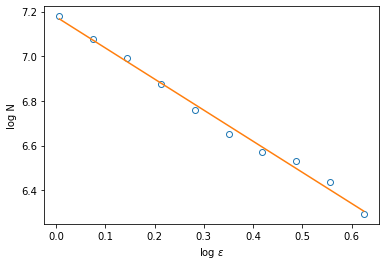

In [2]:
import numpy as np
import pylab as pl
 
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray
 

image=rgb2gray(pl.imread("fracnew.png"))
    
# finding all the non-zero pixels
pixels=[]
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j]>0:
            pixels.append((i,j))
 
Lx=image.shape[1]
Ly=image.shape[0]
print (Lx, Ly)
pixels=pl.array(pixels)
print (pixels.shape)
 
# computing the fractal dimension
#considering only scales in a logarithmic list
scales=np.logspace(0.01, 1, num=10, endpoint=False, base=2)
Ns=[]
# looping over several scales
for scale in scales:
    print ("======= Scale :",scale)
    # computing the histogram
    H, edges=np.histogramdd(pixels, bins=(np.arange(0,Lx,scale),np.arange(0,Ly,scale)))
    Ns.append(np.sum(H>0))
 
# linear fit, polynomial of degree 1
coeffs=np.polyfit(np.log(scales), np.log(Ns), 1)
 
pl.plot(np.log(scales),np.log(Ns), 'o', mfc='none')
pl.plot(np.log(scales), np.polyval(coeffs,np.log(scales)))
pl.xlabel('log $\epsilon$')
pl.ylabel('log N')
pl.savefig('sierpinski_dimension.pdf')
 
print ("The Hausdorff dimension is", -coeffs[0]) #the fractal dimension is the OPPOSITE of the fitting coefficient
np.savetxt("scaling.txt", list(zip(scales,Ns)))